In [15]:
#Step 1. Import the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
#Step 2. Load the finance data:
import requests

#https://www.alphavantage.co/documentation/

api_key = 'demo'
symbol = 'IBM'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['Time Series (Daily)']).transpose()
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [17]:
df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
1999-11-01,98.5,98.81,96.37,96.75,49.0034467091146,9551800,0.0000,1.0
1999-11-02,96.75,96.81,93.69,94.81,48.0208452970662,11105400,0.0000,1.0
1999-11-03,95.87,95.94,93.5,94.37,47.7979872448491,10369100,0.0000,1.0
1999-11-04,94.44,94.44,90.0,91.56,46.3747346840985,16697600,0.0000,1.0
1999-11-05,92.75,92.94,90.19,90.25,45.7112254831793,13737600,0.0000,1.0
...,...,...,...,...,...,...,...,...
2024-11-25,223.35,226.42,222.65,226.13,226.13,7189260,0.0000,1.0
2024-11-26,226.73,228.98,225.5115,228.83,228.83,4449543,0.0000,1.0
2024-11-27,228.83,229.19,224.27,226.92,226.92,2995121,0.0000,1.0
2024-11-29,227.75,230.36,227.19,227.41,227.41,2640253,0.0000,1.0


In [18]:
#Step 3. Preprocess the data:
# Extract the closing prices
y = df['4. close'].values.astype(float)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1))
# Create the feature matrix
X = []
for i in range(60, len(df)):
    X.append(y[i-60:i, 0])
X = np.array(X)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y[60:], test_size=0.2, shuffle=False)

In [19]:
#Step4. Define the model:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
#Step 5. Train the model:

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
 29/157 [====>.........................] - ETA: 4s - loss: 0.0555

KeyboardInterrupt: 

In [12]:
#Step 6. Save the model:

# Save the model
model.save('my_model.h5')  # Save the model in HDF5 format

In [21]:
#Step 7. Evaluate the model:
# Evaluate the model on the validation set
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', rmse)

40/40 [==============================] - 1s 12ms/step
Root Mean Squared Error: 0.06028297014215355


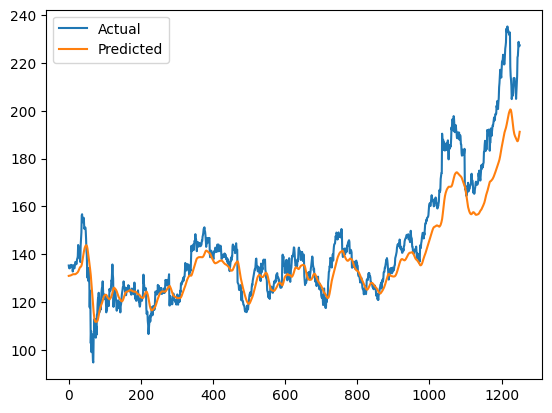

In [22]:
#Step 8. Visualize the results:
# Visualize the results
y_pred = scaler.inverse_transform(y_pred)
y_val = scaler.inverse_transform(y_val)
plt.plot(y_val, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [23]:
#Step 9. Make predictions:
# Make predictions
last_60_days = y[-60:]
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
print('Predicted price:', y_pred[0][0])

1/1 [==============================] - 1s 675ms/step
Predicted price: 40.51613
